# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here

import seaborn as sns
import matplotlib.pyplot as plt
import emoji
from itertools import chain

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/JohnnyBlaze/ads-tm-api-scrape/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "/Users/JohnnyBlaze/ads-tm-api-scrape/positive-words.txt"
negative_words_file = "/Users/JohnnyBlaze/ads-tm-api-scrape/negative-words.txt"
tidy_text_file = "/Users/JohnnyBlaze/ads-tm-api-scrape/tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [4]:
# Read in the lyrics data
lyrics_data = defaultdict(dict)

lyrics_dir = os.path.join(data_location, lyrics_folder)
for root, dirs, files in os.walk(lyrics_dir):
    for file in files:
        artist, song = file.split(".txt")[0].split("_")  # Split the file name using underscore ("_") as the separator
        with open(os.path.join(root, file), 'r', encoding='latin-1') as f:
            lyrics_data[artist][song] = f.read()

lyrics_df = pd.DataFrame.from_dict(lyrics_data, orient='index').stack().reset_index()
lyrics_df.columns = ['Artist', 'Song', 'Lyrics']

# Drop Lyrics Col

lyrics_df = lyrics_df.drop(columns=['Lyrics'])

In [5]:
# Read in the twitter data
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]
twitter_data = defaultdict(dict)

for f in desc_files:
    artist = f.split("_")[0]
    
    if artist == "robynkonichiwa" or artist == "cher":
        with open(data_location + twitter_folder + f, 'r', encoding='utf8') as infile:
            next(infile)
            for idx, line in enumerate(infile.readlines()):
                line = line.strip().split("\t")
                if len(line) == 7:
                    description = line[6]
                    twitter_data[artist][idx] = description

In [6]:
# Read in the twitter data
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]
twitter_data = defaultdict(dict)

for f in desc_files:
    artist = f.split("_")[0]

    if artist == "robynkonichiwa" or artist == "cher":
        with open(data_location + twitter_folder + f, 'r', encoding='utf8') as infile:
            next(infile)
            for idx, line in enumerate(infile.readlines()):
                line = line.strip().split("\t")
                if len(line) == 7:
                    description = line[6]
                    twitter_data[artist][idx] = description

# Convert to Dataframe
df = pd.DataFrame([(artist, desc) for artist, descriptions in twitter_data.items() for idx, desc in descriptions.items()],
                  columns=['artist', 'description'])

In [7]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

# Read positive words
with open(positive_words_file, 'r') as f:
    positive_words = f.read().splitlines()

# Read negative words
with open(negative_words_file, 'r') as f:
    negative_words = f.read().splitlines()

# Read tidytext sentiment
tidy_text_sentiments = pd.read_csv(tidy_text_file, sep='\t')

# Create a dictionary to store the words and their scores
sentiment_scores = {}

# Associate positive words with a score of +1
for word in positive_words:
    sentiment_scores[word] = 1

# Associate negative words with a score of -1
for word in negative_words:
    sentiment_scores[word] = -1

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [8]:
# your code here

sentiment_scores = {} 

for artist, songs in lyrics_data.items():
    for song, lyrics in songs.items():
        
        score = 0

        # Split lyrics into words
        words = lyrics.split()

        for word in words:
            if word in positive_words:
                score += 1
            elif word in negative_words:
                score -= 1

        # Store the sentiment score for the song
        sentiment_scores[(artist, song)] = score

In [9]:
artist_sentiment_scores = {} 

for (artist, song), score in sentiment_scores.items():
    if artist not in artist_sentiment_scores:
        artist_sentiment_scores[artist] = []

    artist_sentiment_scores[artist].append(score)

average_sentiment_per_song = {}
for artist, scores in artist_sentiment_scores.items():
    average_sentiment_per_song[artist] = sum(scores) / len(scores)

artist_with_higher_sentiment = max(average_sentiment_per_song, key=average_sentiment_per_song.get)

print(f"The artist with the higher average sentiment per song is: {artist_with_higher_sentiment}")

The artist with the higher average sentiment per song is: cher


In [10]:
cher_sentiment = average_sentiment_per_song.get("cher")
robyn_sentiment = average_sentiment_per_song.get("robyn")

print(f"Cher's average sentiment per song: {cher_sentiment}")
print(f"Robyn's average sentiment per song: {robyn_sentiment}")

Cher's average sentiment per song: 2.1772151898734178
Robyn's average sentiment per song: 0.875


In [12]:
artist1 = "cher"
artist2 = "robyn"

artist1_scores = {song: score for (artist, song), score in sentiment_scores.items() if artist == artist1}
artist2_scores = {song: score for (artist, song), score in sentiment_scores.items() if artist == artist2}

top3_artist1 = sorted(artist1_scores, key=artist1_scores.get, reverse=True)[:3]
top3_artist2 = sorted(artist2_scores, key=artist2_scores.get, reverse=True)[:3]
low3_artist1 = sorted(artist1_scores, key=artist1_scores.get)[:3]
low3_artist2 = sorted(artist2_scores, key=artist2_scores.get)[:3]

print(f"Top 3 songs with the highest sentiment scores for {artist1}:")
for song in top3_artist1:
    print(song)

print()

print(f"Top 3 songs with the highest sentiment scores for {artist2}:")
for song in top3_artist2:
    print(song)

print()

print(f"Top 3 songs with the lowest sentiment scores for {artist1}:")
for song in low3_artist1:
    print(song)

print()

print(f"Top 3 songs with the lowest sentiment scores for {artist2}:")
for song in low3_artist2:
    print(song)

Top 3 songs with the highest sentiment scores for cher:
perfection
loveandunderstanding
mylove

Top 3 songs with the highest sentiment scores for robyn:
loveisfree
indestructible
buffalostance

Top 3 songs with the lowest sentiment scores for cher:
iwalkonguildedsplinters
outrageous
julie

Top 3 songs with the lowest sentiment scores for robyn:
dontfuckingtellmewhattodo
dontfuckingtellmewhattodo114520
criminalintent


In [13]:
artist1 = "cher"
artist2 = "robyn"

artist1_scores = {song: score for (artist, song), score in sentiment_scores.items() if artist == artist1}
artist2_scores = {song: score for (artist, song), score in sentiment_scores.items() if artist == artist2}

top3_artist1 = sorted(artist1_scores, key=artist1_scores.get, reverse=True)[:3]
top3_artist2 = sorted(artist2_scores, key=artist2_scores.get, reverse=True)[:3]
low3_artist1 = sorted(artist1_scores, key=artist1_scores.get)[:3]
low3_artist2 = sorted(artist2_scores, key=artist2_scores.get)[:3]

print(f"Top 3 songs with the highest sentiment scores for {artist1}:")
for song in top3_artist1:
    print(f"Title: {song}")
    print("Lyrics:")
    print(lyrics_data[artist1][song])
    print()

print(f"Top 3 songs with the highest sentiment scores for {artist2}:")
for song in top3_artist2:
    print(f"Title: {song}")
    print("Lyrics:")
    print(lyrics_data[artist2][song])
    print()

print(f"Top 3 songs with the lowest sentiment scores for {artist1}:")
for song in low3_artist1:
    print(f"Title: {song}")
    print("Lyrics:")
    print(lyrics_data[artist1][song])
    print()

print(f"Top 3 songs with the lowest sentiment scores for {artist2}:")
for song in low3_artist2:
    print(f"Title: {song}")
    print("Lyrics:")
    print(lyrics_data[artist2][song])
    print()

Top 3 songs with the highest sentiment scores for cher:
Title: perfection
Lyrics:
"Perfection"



Hush little Baby, gotta be strong
'Cause in this world we are born to fight
Be the best, prove them wrong
A winner's work is never done, reach the top, number one

Oh, perfection
You drive me crazy with perfection
I've worn my pride as my protection
Perfection, ohh

I was taught to be tough
That the best that you can be ain't enough
Crack the whip, sacrifice
But I found out paradise had a price

I didn't know it then, but oh I know it now
You gotta work as hard as love to make the love work out
You know this heart of mine has made some big mistakes
I guess that when it comes to love, I just don't know what I takes

All my life I've been driven by perfection
Pushed it to the limit every day and night
Ohh, I've been driven by perfection
But nothing's perfect when love ain't right
Nothing's perfect when the love ain't right

Gave it all, played my part
I gave everything I had but my heart
Wor

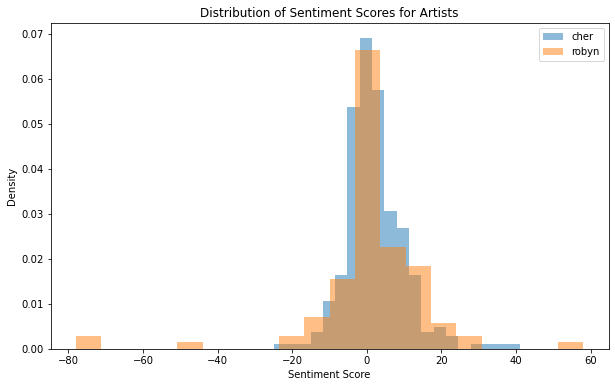

In [14]:
# Histograms for each Artist
artist1 = "cher"
artist2 = "robyn"

artist1_scores = [score for (artist, _), score in sentiment_scores.items() if artist == artist1]
artist2_scores = [score for (artist, _), score in sentiment_scores.items() if artist == artist2]

plt.figure(figsize=(10, 6))
plt.hist(artist1_scores, bins=20, density=True, alpha=0.5, label=artist1)
plt.hist(artist2_scores, bins=20, density=True, alpha=0.5, label=artist2)
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.title("Distribution of Sentiment Scores for Artists")
plt.legend()
plt.show()

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Based on my results Cher had the higher average sentiment per song at 2.18.

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: Top 3 songs with the highest sentiment scores for cher:
perfection
loveandunderstanding
mylove

Top 3 songs with the lowest sentiment scores for cher:
iwalkonguildedsplinters
outrageous
julie

The lyrics are printed in the code above.

Since the code we wrote adds one and subtracts one for positive or negative words in the lyrics, the scores represent the overall emotional tone of the songs. Lyrics with more negative words will contribute to a lower score and the opposite for songs with more positive words.

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: Top 3 songs with the highest sentiment scores for robyn:
loveisfree
indestructible
buffalostance

Top 3 songs with the lowest sentiment scores for robyn:
dontfuckingtellmewhattodo
dontfuckingtellmewhattodo114520
criminalintent

The lyrics are printed in the code above.

Since the code we wrote adds one and subtracts one for positive or negative words in the lyrics, the scores represent the overall emotional tone of the songs. Lyrics with more negative words will contribute to a lower score and the opposite for songs with more positive words.

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

A: See graph above.


## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [15]:
positive_emojis = ["😄", "😊", "👍", "🥳", "❤️", "🌟", "💯", "🤩", "🙌", "🔥", "😃", "😁", "🎉", "👏", "✨", "🥰", "🌞", "🎶", "💃", "👑"]
negative_emojis = ["😔", "😞", "👎", "😢", "💔", "🙁", "😡", "😠", "😒", "🤬", "😩", "😭", "🤦", "💀", "👿", "🤯", "👻", "🙅", "😤", "🙄"]

In [16]:
emoji_sentiment = dict(zip(positive_emojis,[1]*20))
emoji_sentiment.update(dict(zip(negative_emojis,[-1]*20)))

In [17]:
def get_desc_sentiment(desc,sent=emoji_sentiment) :
    
    sentiment = sum([sent[ch] for ch in str(desc) if ch in sent])
    return(sentiment)

def extract_emojis(desc,emoji_list) : 
    emojis = [ch for ch in str(desc) if ch in emoji_list]
    return(emojis)

In [18]:
# Apply sentiment analysis and extract emojis
df['sentiment'] = df['description'].apply(get_desc_sentiment)
df['pos_emoji'] = df['description'].apply(extract_emojis, args=(positive_emojis,))
df['neg_emoji'] = df['description'].apply(extract_emojis, args=(negative_emojis,))

# Calculate average sentiment per artist
artist_sentiment_scores = df.groupby('artist')['sentiment'].mean()

# Print the average sentiment scores per artist
for artist, sentiment in artist_sentiment_scores.items():
    print(f"Average sentiment score for {artist}: {sentiment}")

Average sentiment score for cher: 0.035761509977062504
Average sentiment score for robynkonichiwa: 0.024253682255187255


In [19]:
positive_emoji_counts = {}
negative_emoji_counts = {}

for artist, emojis in df.groupby('artist')[['pos_emoji', 'neg_emoji']]:
    # Flatten the list
    pos_emojis_list = list(chain.from_iterable(emojis['pos_emoji']))
    neg_emojis_list = list(chain.from_iterable(emojis['neg_emoji']))
    
    if pos_emojis_list:
        pos_emoji_counts = Counter(pos_emojis_list)
        
        positive_emoji_counts[artist] = pos_emoji_counts
    else:
        positive_emoji_counts[artist] = Counter()

    if neg_emojis_list:
        neg_emoji_counts = Counter(neg_emojis_list)
        
        negative_emoji_counts[artist] = neg_emoji_counts
    else:
        negative_emoji_counts[artist] = Counter()

most_common_positive_emojis = {
    artist: pos_emoji_counts.most_common(1)[0][0] if pos_emoji_counts else "No positive emojis found"
    for artist, pos_emoji_counts in positive_emoji_counts.items()
}

most_common_negative_emojis = {
    artist: neg_emoji_counts.most_common(1)[0][0] if neg_emoji_counts else "No negative emojis found"
    for artist, neg_emoji_counts in negative_emoji_counts.items()
}

# Print the most common positive and negative emojis by artist
for artist in most_common_positive_emojis.keys():
    print(f"Artist: {artist}")
    print(f"Most common positive emoji: {most_common_positive_emojis[artist]}")
    print(f"Most common negative emoji: {most_common_negative_emojis[artist]}")
    print("")

Artist: cher
Most common positive emoji: ✨
Most common negative emoji: 👻

Artist: robynkonichiwa
Most common positive emoji: ✨
Most common negative emoji: 👻



Q: What is the average sentiment of your two artists? 

A: Using 20 Emoji's here's my average scores for each artist

Average sentiment score for cher: 0.035761509977062504
Average sentiment score for robynkonichiwa: 0.024253682255187255

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: Surprisingly the same emoji's the snapchat ghost as the most common negative emoji and the sparkle as the most common negative emoji

Artist: cher
Most common positive emoji: ✨
Most common negative emoji: 👻

Artist: robynkonichiwa
Most common positive emoji: ✨
Most common negative emoji: 👻

